In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf

In [148]:
audio_path = 'data/Segmented_Laugh/220.wav'
x , sr = librosa.load(audio_path, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


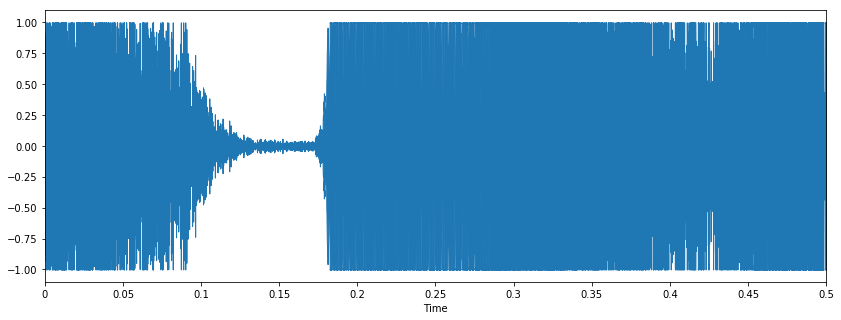

In [149]:
#display waveform
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
ipd.Audio(audio_path)

(20, 16)


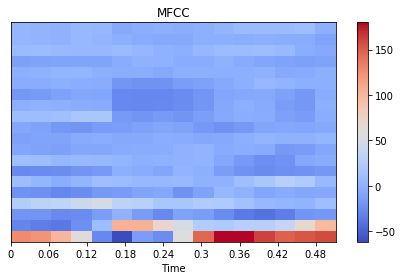

In [150]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

# CALCULATING ZERO CROSSINGS

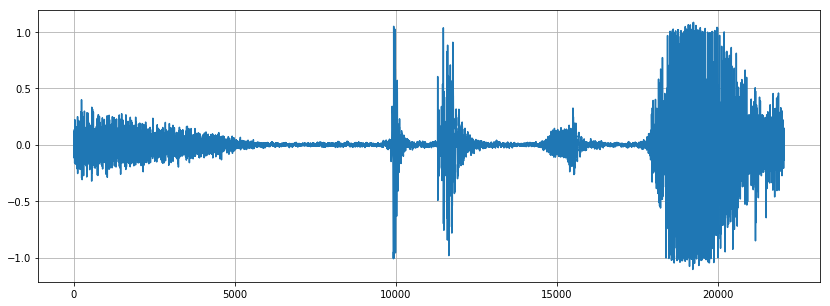

In [21]:
# Zooming in
n0 = 6*sr
n1 = 7*sr
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# FINDING NUMBER OF ZERO CROSSING

In [23]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4973


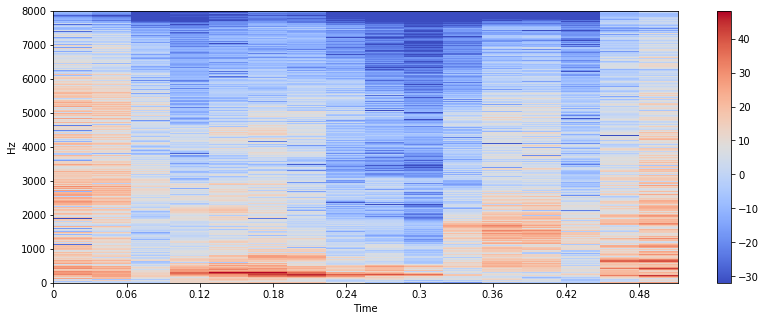

In [82]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# CALCULATING MFCC'S

(20, 16)


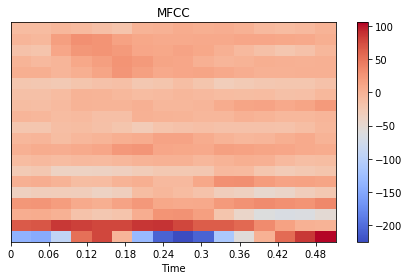

In [141]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [88]:
0.5/16

0.03125

In [86]:
sr

16000

In [36]:
librosa.effects.split(x, top_db=0.0001, frame_length=2048, hop_length=512)

array([[230400, 230912]])

In [63]:
from pydub import AudioSegment
t1 = 5 * 1000 #Works in milliseconds
t2 = 6 * 1000
newAudio = AudioSegment.from_wav("data/vocalizationcorpus/data/S0006.wav")
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [69]:
audio_path = 'data/vocalizationcorpus/data/S0006.wav'
x , sr = librosa.load(audio_path, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [70]:
x.shape[0]

176000

In [71]:
sr

16000

In [75]:
sf.write('new.wav', x[16000:16000*3], sr)

In [76]:
audio_path = 'new.wav'
y , sr2 = librosa.load(audio_path, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz
print(type(y), type(sr2))

<class 'numpy.ndarray'> <class 'int'>


In [77]:
ipd.Audio(audio_path)

In [78]:
y.shape

(32000,)